In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-dataset/cleaned_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cleaned_df=pd.read_csv("/kaggle/input/cleaned-dataset/cleaned_dataset.csv")
cleaned_df.head()

,status,cleaned_statement,num_of_characters,num_of_sentences
0,anxiety,oh gosh,10,1
1,anxiety,trouble sleep confuse mind restless heart tune,64,2
2,anxiety,wrong back dear forward doubt stay restless re...,78,2
3,anxiety,shift focus something else still worried,61,1
4,anxiety,restless restless month boy mean,72,2


In [4]:
cleaned_df.isnull().sum()

status                 0
cleaned_statement    169
num_of_characters      0
num_of_sentences       0
dtype: int64

In [5]:
cleaned_df.drop(cleaned_df[cleaned_df['cleaned_statement'].isnull()==True].index,axis=0,inplace=True)

In [6]:
cleaned_df.isnull().sum()

status               0
cleaned_statement    0
num_of_characters    0
num_of_sentences     0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
lbl_enc = LabelEncoder()

# Fit and transform labels
cleaned_df['status_encoded'] = lbl_enc.fit_transform(cleaned_df['status'])

# View encoded labels
#print("Encoded Labels:", cleaned_df['status_encoded'])

# View label mapping
label_mapping = dict(zip(lbl_enc.classes_, range(len(lbl_enc.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'anxiety': 0, 'bipolar': 1, 'depression': 2, 'normal': 3, 'personality disorder': 4, 'stress': 5, 'suicidal': 6}


In [8]:
cleaned_df

,status,cleaned_statement,num_of_characters,num_of_sentences,status_encoded
0,anxiety,oh gosh,10,1,0
1,anxiety,trouble sleep confuse mind restless heart tune,64,2,0
2,anxiety,wrong back dear forward doubt stay restless re...,78,2,0
3,anxiety,shift focus something else still worried,61,1,0
4,anxiety,restless restless month boy mean,72,2,0
...,...,...,...,...,...
52676,anxiety,nobody take seriously dealt depressionanxiety ...,1766,16,0
52677,anxiety,selfishness feel good like belong world think ...,1012,11,0
52678,anxiety,way sleep good sleep night med help,85,2,0
52679,anxiety,public speak tip hi give presentation work nex...,401,6,0


In [9]:
anxiety_df=cleaned_df[cleaned_df['status']=='anxiety']
normal_df=cleaned_df[cleaned_df['status']=='normal']
depression_df=cleaned_df[cleaned_df['status']=='depression']
suicidal_df=cleaned_df[cleaned_df['status']=='suicidal']
stress_df=cleaned_df[cleaned_df['status']=='stress']
bipolar_df=cleaned_df[cleaned_df['status']=='bipolar']
personality_disorder_df=cleaned_df[cleaned_df['status']=='personality disorder']

In [10]:
print(anxiety_df['status'].value_counts())
print("---------------------------------")
print(normal_df['status'].value_counts())
print("---------------------------------")
print(depression_df['status'].value_counts())
print("---------------------------------")
print(suicidal_df['status'].value_counts())
print("---------------------------------")
print(stress_df['status'].value_counts())
print("---------------------------------")
print(bipolar_df['status'].value_counts())
print("---------------------------------")
print(personality_disorder_df['status'].value_counts())


status
anxiety    3841
Name: count, dtype: int64
---------------------------------
status
normal    16178
Name: count, dtype: int64
---------------------------------
status
depression    15403
Name: count, dtype: int64
---------------------------------
status
suicidal    10649
Name: count, dtype: int64
---------------------------------
status
stress    2587
Name: count, dtype: int64
---------------------------------
status
bipolar    2777
Name: count, dtype: int64
---------------------------------
status
personality disorder    1077
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.metrics import accuracy_score

In [12]:
# Sample 100 random rows from each DataFrame
seed=42
sample_anxiety = anxiety_df.sample(n=3541, random_state=seed) #3841
sample_normal = normal_df.sample(n=16000, random_state=seed) #16178
sample_depression = depression_df.sample(n=15000, random_state=seed) #15403
sample_suicidal = suicidal_df.sample(n=10000, random_state=seed) #10649
sample_stress = stress_df.sample(n=2587, random_state=seed) #2587
sample_bipolar = bipolar_df.sample(n=2777, random_state=seed) #2777
sample_personality_disorder = personality_disorder_df.sample(n=1077, random_state=seed) #1077

# Concatenate samples vertically (row-wise)
combined_df = pd.concat(
    [sample_anxiety,sample_normal, sample_depression, sample_suicidal, sample_stress, sample_bipolar, sample_personality_disorder]
)

# Assume 'labels' is a column indicating the target for each row in combined_df
x = combined_df[['cleaned_statement','num_of_characters','num_of_sentences']]  # Text features
y = combined_df['status_encoded'] # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=seed)

In [13]:
combined_df

,status,cleaned_statement,num_of_characters,num_of_sentences,status_encoded
33915,anxiety,health anxiety checking temperature time day c...,173,2,0
52678,anxiety,way sleep good sleep night med help,85,2,0
52058,anxiety,lamictal anyone good review lamictal,51,2,0
51618,anxiety,anyone try emdr therapy start thought like far...,163,5,0
35073,anxiety,would may ecg pick worried yesterday drill woo...,1392,9,0
...,...,...,...,...,...
50790,personality disorder,disorder feel like permanent burnout would nev...,283,6,4
50926,personality disorder,iv e avoid financial aid appeal really want ta...,169,3,4
50581,personality disorder,avpd covid ruin dream job nanny year daycare o...,1100,12,4
51504,personality disorder,know actually avpd last month struggeling lot ...,748,7,4


In [14]:
x_train

,cleaned_statement,num_of_characters,num_of_sentences
12024,would never guess thing like compliment always...,398,8
39425,really need place vent right kind move univers...,1665,1
13911,get suicide kit exit bag,39,2
17207,start therapy go plan sit talk thing destroy w...,716,8
16241,dog id reason kill could id give dog love atte...,218,3
...,...,...,...
2659,album come soon,23,1
49277,deal previous stress situation stress since mi...,643,7
16456,fairness entirely sure find want leave life be...,1157,25
34530,terrify brain amoeba fowleri hi everyone south...,2183,12


In [15]:
y_train

12024    6
39425    2
13911    6
17207    2
16241    6
        ..
2659     3
49277    5
16456    6
34530    0
924      3
Name: status_encoded, Length: 40785, dtype: int64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens' column
vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_features=50000)
x_train_tfidf = vectorizer.fit_transform(x_train['cleaned_statement'])
x_test_tfidf = vectorizer.transform(x_test['cleaned_statement'])

# 2. Extract numerical features
x_train_num = x_train[['num_of_characters', 'num_of_sentences']].values
x_test_num = x_test[['num_of_characters', 'num_of_sentences']].values

# 3. Combine TF-IDF features with numerical features
x_train_combined = hstack([x_train_tfidf, x_train_num])
x_test_combined = hstack([x_test_tfidf, x_test_num])

print('Number of feature words: ', len(vectorizer.get_feature_names_out()))

Number of feature words:  50000


In [17]:
import pickle
# Open the file in write-binary mode
with open('vectorizer_kaggle.pkl','wb') as file:
    # Dump the model to the file
    pickle.dump(vectorizer, file)

In [18]:
x_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2368097 stored elements and shape (40785, 50000)>

In [19]:
combined_df

,status,cleaned_statement,num_of_characters,num_of_sentences,status_encoded
33915,anxiety,health anxiety checking temperature time day c...,173,2,0
52678,anxiety,way sleep good sleep night med help,85,2,0
52058,anxiety,lamictal anyone good review lamictal,51,2,0
51618,anxiety,anyone try emdr therapy start thought like far...,163,5,0
35073,anxiety,would may ecg pick worried yesterday drill woo...,1392,9,0
...,...,...,...,...,...
50790,personality disorder,disorder feel like permanent burnout would nev...,283,6,4
50926,personality disorder,iv e avoid financial aid appeal really want ta...,169,3,4
50581,personality disorder,avpd covid ruin dream job nanny year daycare o...,1100,12,4
51504,personality disorder,know actually avpd last month struggeling lot ...,748,7,4


In [20]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Over-Sampling on the vectorized data
ros = RandomOverSampler(random_state=101)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train_tfidf, y_train)

In [21]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [22]:
classifiers = {
    'Bernoulli Naive Bayes': BernoulliNB(alpha=0.1, binarize=0.0),
    'Decision Tree': DecisionTreeClassifier(max_depth=9, min_samples_split=5, random_state=101), 
    'Multinomial Naive Bayes':MultinomialNB(),
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1', C=10, random_state=101),
    #'SVM' :SVC()
    #'XGB': XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=500, random_state=101) #tree_method='gpu_hist'
}

In [23]:
# Initialize a list to store accuracy scores for each classifier
accuracy_scores = []

# Iterate over each classifier and its name in the classifiers dictionary
for name, clf in classifiers.items():
    clf.fit(x_train_resampled, y_train_resampled)
    y_pred = clf.predict(x_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("\n")
    print("For", name)
    print("Accuracy:", accuracy)
    
    # Compute the confusion matrix for the predictions
    # 'lbl_enc.classes_' provides the class labels for the confusion matrix and classification report
    #labels = lbl_enc.classes_
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Precision : {precision_score(y_test,y_pred,average='weighted')}")
    print(f"Recall : {recall_score(y_test,y_pred,average='weighted')}")
    print(f"Weighted F1-Score :{f1_score(y_test,y_pred,average='weighted')}")
    #print(classification_report(y_test, y_pred, target_names=labels))
    
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)





For Bernoulli Naive Bayes
Accuracy: 0.6366578405413357
Precision : 0.6372792789107773
Recall : 0.6366578405413357
Weighted F1-Score :0.6223916414027129


For Decision Tree
Accuracy: 0.5427086397960185
Precision : 0.5666978977843858
Recall : 0.5427086397960185
Weighted F1-Score :0.5442289078035594


For Multinomial Naive Bayes
Accuracy: 0.6024320878689811
Precision : 0.6971496147344766
Recall : 0.6024320878689811
Weighted F1-Score :0.6149418767434887


For Logistic Regression
Accuracy: 0.7265862508580955
Precision : 0.7257250961026059
Recall : 0.7265862508580955
Weighted F1-Score :0.725581192617846


In [24]:
log_reg_model_kaggle=LogisticRegression(solver='newton-cg', penalty='l2', C=10,multi_class='ovr')
log_reg_model_kaggle.fit(x_train_resampled, y_train_resampled)
y_pred = log_reg_model_kaggle.predict(x_test_tfidf)
print("Log reg accuracy : ", accuracy_score(y_test, y_pred))
print(f"Precision : {precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall : {recall_score(y_test,y_pred,average='weighted')}")
print(f"Weighted F1-Score :{f1_score(y_test,y_pred,average='weighted')}")

Log reg accuracy :  0.7477689516524468
Precision : 0.7466049704283259
Recall : 0.7477689516524468
Weighted F1-Score :0.7462212580753279


In [25]:
print(confusion_matrix(y_test, y_pred))
#Label Mapping: {'anxiety': 0, 'bipolar': 1, 'depression': 2, 'normal': 3, 'personality disorder': 4, 'stress': 5, 'suicidal': 6}

[[ 595   12   39   40    5   21   12]
 [   9  425   68   20    1   12   22]
 [  90   62 1948  135   37   79  658]
 [  31    1   68 2944    5   71   69]
 [   5    3   32   19  144   10   11]
 [  44    8   95   48    9  309   52]
 [  10   16  475  126   13   29 1260]]


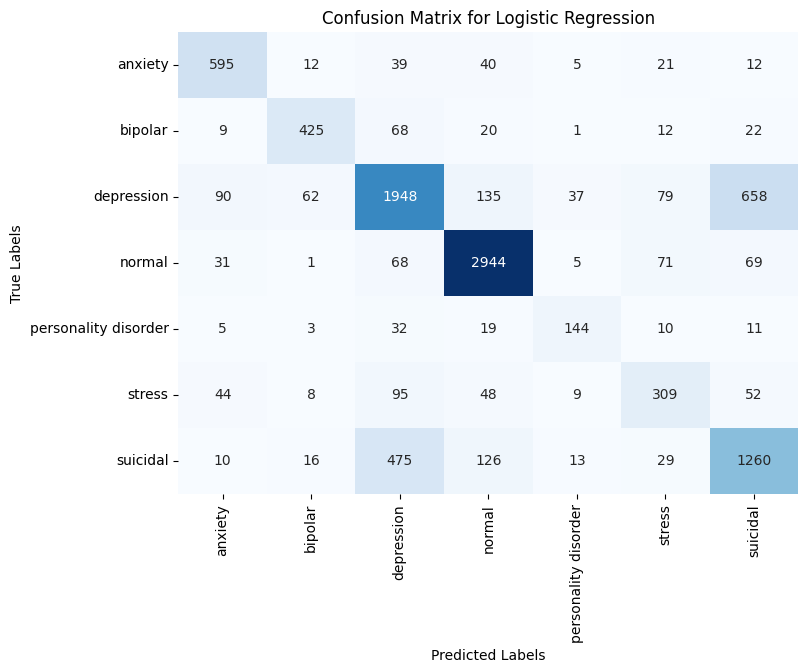

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
labels = ['anxiety', 'bipolar', 'depression', 'normal', 'personality disorder', 'stress', 'suicidal']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')

# Display the plot
plt.show()


In [27]:
import pickle
# Open the file in write-binary mode
with open('log_reg_model_kaggle.pkl', 'wb') as file:
    # Dump the model to the file
    pickle.dump(log_reg_model_kaggle, file)

In [28]:
# Train a model (e.g., RandomForestClassifier)
model = RandomForestClassifier(max_depth=40, min_samples_split=5, random_state=101)
model.fit(x_train_resampled, y_train_resampled)

# Predict using the trained model
y_pred = model.predict(x_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision : {precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall : {recall_score(y_test,y_pred,average='weighted')}")
print(f"Weighted F1-Score :{f1_score(y_test,y_pred,average='weighted')}")

Model Accuracy: 0.6837
Precision : 0.681138606669913
Recall : 0.6837305089732274
Weighted F1-Score :0.6730883937667527


In [29]:
from sklearn.ensemble import BaggingClassifier
# Wrap the base model with BaggingClassifier
bagging_model = BaggingClassifier(estimator=model, n_estimators=10, random_state=101)

# Train the bagging model
bagging_model.fit(x_train_resampled, y_train_resampled)

# Predict using the bagging model
y_pred_bagging = bagging_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Model Accuracy: {accuracy_bagging:.4f}")

Bagging Model Accuracy: 0.6905


In [30]:
XGB_model=XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=40, random_state=101)

# Train the bagging model
XGB_model.fit(x_train_resampled, y_train_resampled)

# Predict using the bagging model
y_pred_XGB = XGB_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_XGB)
print(f"Bagging Model Accuracy: {accuracy_bagging:.4f}")

Bagging Model Accuracy: 0.7167


In [31]:
XGB_model=XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=80, random_state=101)

# Train the bagging model
XGB_model.fit(x_train_resampled, y_train_resampled)

# Predict using the bagging model
y_pred_XGB = XGB_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_XGB)
print(f"Bagging Model Accuracy: {accuracy_bagging:.4f}")

Bagging Model Accuracy: 0.7294


In [32]:
print(confusion_matrix(y_test, y_pred_XGB))

[[ 592   11   32   37    8   30   14]
 [  14  419   49   21    9   23   22]
 [  90  100 1728  170   75  128  718]
 [  40    7   38 2912   14  127   51]
 [  10    3   27   19  146   14    5]
 [  59    3   59   39   14  351   40]
 [  17   27  345  168   23   59 1290]]


In [33]:
XGB_model=XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=150, random_state=101)

# Train the bagging model
XGB_model.fit(x_train_resampled, y_train_resampled)

# Predict using the bagging model
y_pred_XGB = XGB_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy_boosting = accuracy_score(y_test, y_pred_XGB)
print(f"Boosting Model Accuracy: {accuracy_boosting:.4f}")
print(f"Precision : {precision_score(y_test,y_pred_XGB,average='weighted')}")
print(f"Recall : {recall_score(y_test,y_pred_XGB,average='weighted')}")
print(f"Weighted F1-Score :{f1_score(y_test,y_pred_XGB,average='weighted')}")

Boosting Model Accuracy: 0.7412
Precision : 0.7453510362274853
Recall : 0.7411983916838286
Weighted F1-Score :0.7401484238031037


In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

print(confusion_matrix(y_test, y_pred_XGB))

[[ 595   11   36   30    5   31   16]
 [  12  429   49   23    6   18   20]
 [  77   90 1819  158   47  113  705]
 [  33    7   48 2921    7  122   51]
 [  10    2   33   19  139   13    8]
 [  57    5   69   41    8  347   38]
 [  13   23  383  140   14   48 1308]]


In [35]:
XGB_model=XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=250, random_state=101)

# Train the bagging model
XGB_model.fit(x_train_resampled, y_train_resampled)

# Predict using the bagging model
y_pred_XGB = XGB_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy_boosting = accuracy_score(y_test, y_pred_XGB)
print(f"Boosting Model Accuracy: {accuracy_boosting:.4f}")
print(f"Precision : {precision_score(y_test,y_pred_XGB,average='weighted')}")
print(f"Recall : {recall_score(y_test,y_pred_XGB,average='weighted')}")
print(f"Weighted F1-Score :{f1_score(y_test,y_pred_XGB,average='weighted')}")

Boosting Model Accuracy: 0.7498
Precision : 0.7513469166956932
Recall : 0.7498283808963421
Weighted F1-Score :0.7490022386431485


In [36]:
print(confusion_matrix(y_test, y_pred_XGB))

[[ 599   12   37   27    3   31   15]
 [  10  426   61   21    4   15   20]
 [  69   84 1914  150   27   96  669]
 [  32    6   60 2924    7  109   51]
 [   9    3   34   16  138   12   12]
 [  50    4   88   37    5  349   32]
 [  11   24  425  126    8   39 1296]]


In [37]:
XGB_model=XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=300, random_state=101)

# Train the bagging model
XGB_model.fit(x_train_resampled, y_train_resampled)

# Predict using the bagging model
y_pred_XGB = XGB_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy_boosting = accuracy_score(y_test, y_pred_XGB)
print(f"Boosting Model Accuracy: {accuracy_boosting:.4f}")

Boosting Model Accuracy: 0.7533


In [38]:
print(confusion_matrix(y_test, y_pred_XGB))

[[ 597   12   41   27    3   29   15]
 [  11  425   61   22    3   14   21]
 [  65   78 1949  148   26   86  657]
 [  30    5   63 2926    6  106   53]
 [  10    4   40   15  135   10   10]
 [  48    4   87   38    2  352   34]
 [  11   24  436  119    7   35 1297]]


In [39]:
# Open the file in write-binary mode
with open('XGB_model_kaggle.pkl', 'wb') as file:
    # Dump the model to the file
    pickle.dump(XGB_model, file)

In [40]:
XGB_model=XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=400, random_state=101)

# Train the bagging model
XGB_model.fit(x_train_resampled, y_train_resampled)

# Predict using the bagging model
y_pred_XGB = XGB_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy_boosting = accuracy_score(y_test, y_pred_XGB)
print(f"Boosting Model Accuracy: {accuracy_boosting:.4f}")

Boosting Model Accuracy: 0.7570


In [41]:
print(confusion_matrix(y_test, y_pred_XGB))

[[ 597   11   43   26    2   28   17]
 [  11  428   64   21    3   11   19]
 [  66   65 2000  137   19   72  650]
 [  28    6   69 2927    5  103   51]
 [   9    3   42   15  133   10   12]
 [  45    6   95   43    3  337   36]
 [  11   21  453  111    3   33 1297]]


In [42]:
# Open the file in write-binary mode
with open('new_XGB_model_kaggle.pkl', 'wb') as file:
    # Dump the model to the file
    pickle.dump(XGB_model, file)